In [52]:
import pandas as pd
import numpy as np
import sqlalchemy as sa
%matplotlib inline

In [7]:
pd.set_option('max_colwidth',-1)

In [4]:
con = sa.create_engine('sqlite:///edgar_htm_idx.db').connect()

In [10]:
ticker_df.columns

Index(['conm', 'type', 'cik', 'date', 'path', 'year', 'quarter', 'CIK',
       'Ticker', 'Name', 'Exchange', 'SIC', 'Business', 'Incorporated', 'IRS',
       'CIK', 'Ticker', 'Name', 'Exchange', 'SIC', 'Business', 'Incorporated',
       'IRS'],
      dtype='object')

In [16]:
import re, requests

def getCIKs(TICKERS):
    URL = 'http://www.sec.gov/cgi-bin/browse-edgar?CIK={}&Find=Search&owner=exclude&action=getcompany'
    CIK_RE = re.compile(r'.*CIK=(\d{10}).*')    
    cik_dict = {}
    for ticker in TICKERS:
        f = requests.get(URL.format(ticker), stream = True)
        results = CIK_RE.findall(f.text)
        if len(results):
            results[0] = int(re.sub('\.[0]*', '.', results[0]))
            cik_dict[str(ticker).upper()] = str(results[0])
    f = open('cik_dict', 'w')   
    print(cik_dict)
    f.close()

getCIKs(['nap','bidu'])

{'NAP': '1617049', 'BIDU': '1329099'}


In [19]:
def getCIK(ticker):
    URL = 'http://www.sec.gov/cgi-bin/browse-edgar?CIK={}&Find=Search&owner=exclude&action=getcompany'
    CIK_RE = re.compile(r'.*CIK=(\d{10}).*')    
    f = requests.get(URL.format(ticker), stream = True)
    results = CIK_RE.findall(f.text)
    if len(results):
        results[0] = int(re.sub('\.[0]*', '.', results[0]))
        return str(results[0])
    else:
        return None
        

In [37]:
ticker = 'NAP'
cik = getCIK(ticker)
ticker_df = pd.read_sql('select * from idx where cik={} and type in ("10-Q","10-K","20-F")'.format(cik), con)

In [38]:
ticker_df

,conm,type,cik,date,path,year,quarter
0,Navios Maritime Midstream Partners LP,20-F,1617049,2015-03-17,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-15-095533-index.htm,2015,1
1,Navios Maritime Midstream Partners LP,20-F,1617049,2016-03-08,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-16-496861-index.htm,2016,1
2,Navios Maritime Midstream Partners LP,20-F,1617049,2017-03-08,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-17-074840-index.htm,2017,1
3,Navios Maritime Midstream Partners LP,20-F,1617049,2018-03-09,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-18-077362-index.htm,2018,1


In [39]:
ticker_df

,conm,type,cik,date,path,year,quarter
0,Navios Maritime Midstream Partners LP,20-F,1617049,2015-03-17,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-15-095533-index.htm,2015,1
1,Navios Maritime Midstream Partners LP,20-F,1617049,2016-03-08,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-16-496861-index.htm,2016,1
2,Navios Maritime Midstream Partners LP,20-F,1617049,2017-03-08,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-17-074840-index.htm,2017,1
3,Navios Maritime Midstream Partners LP,20-F,1617049,2018-03-09,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-18-077362-index.htm,2018,1


In [40]:
nap_df = pd.read_pickle('testout/NAP.pkl')

In [42]:
from xbrl_parser import *

In [43]:
nap_df = preprocess_df(nap_df)

In [45]:
nap_df_consolidated = get_consolidated_df(nap_df)

In [54]:
nap_df_consolidated.Account.value_counts()

us-gaap:CashAndCashEquivalentsAtCarryingValue                                                                                7
us-gaap:IncreaseDecreaseInAccountsPayable                                                                                    6
us-gaap:AmortizationOfDeferredCharges                                                                                        6
us-gaap:PaymentsToAcquireBusinessesGross                                                                                     6
us-gaap:OtherExpenses                                                                                                        6
us-gaap:DirectOperatingCosts                                                                                                 6
us-gaap:NetIncomeLoss                                                                                                        6
us-gaap:ProfessionalAndContractServicesExpense                                                                 

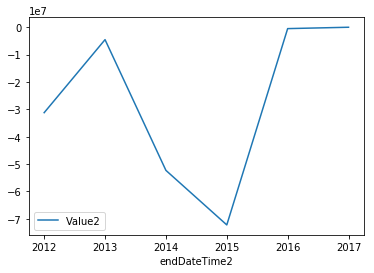

In [59]:
nap_df_consolidated.query("Account=='us-gaap:NetCashProvidedByUsedInInvestingActivities'").plot(x='endDateTime2',y='Value2')